### Importing the libraries

In [16]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

### Loading the matches dataset

In [2]:
matches = pd.read_csv('C:\\KIIT\\5th Semester\\Internship\\Data Scientist\\Week-3\\worldcups.csv')
matches.head()

,year,host,winner,second,third,fourth,goals_scored,teams,games,attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,434000
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,395000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,483000
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1337000
4,1954,Switzerland,West Germany,Hungary,Austria,Uruguay,140,16,26,943000


Text(0.5, 1.0, 'Goals Scored over Years')

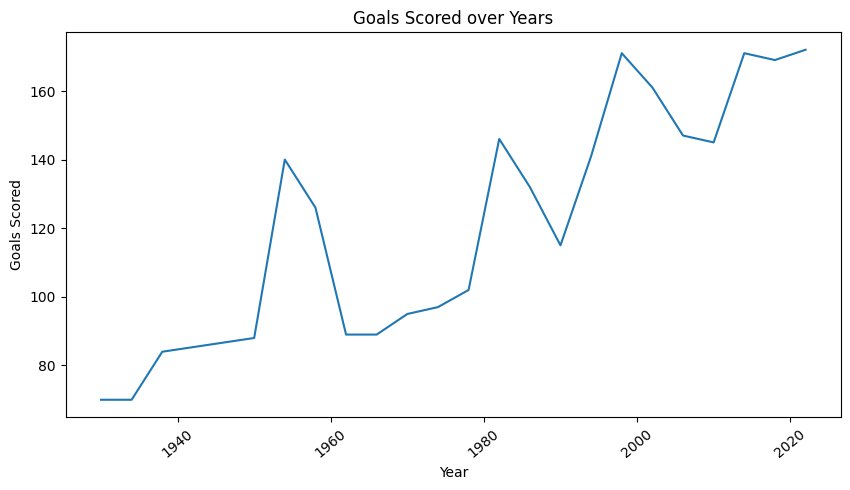

In [3]:
plt.figure(figsize=(10,5))
plt.plot(matches.year, matches.goals_scored)
plt.xlabel('Year')
plt.ylabel('Goals Scored')
plt.xticks(rotation = 40)
plt.title('Goals Scored over Years')

Text(0.5, 1.0, 'Number of spectators over Years')

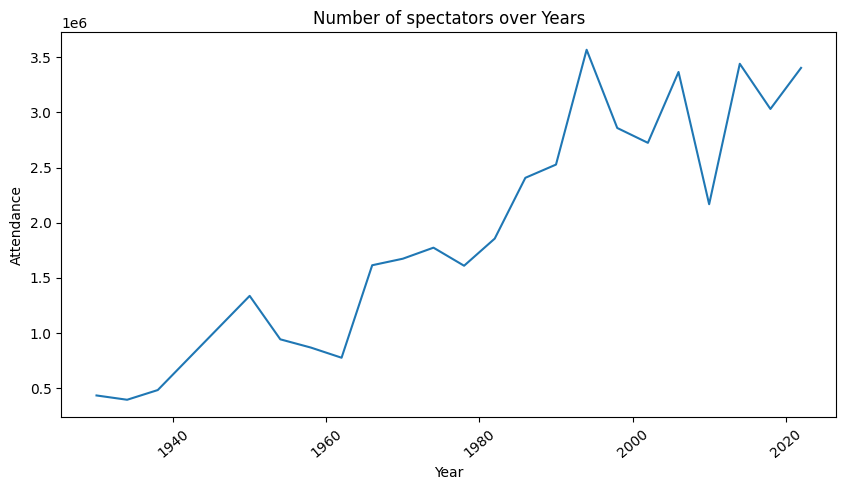

In [4]:
plt.figure(figsize=(10,5))
plt.plot(matches.year, matches.attendance)
plt.xlabel('Year')
plt.ylabel('Attendance')
plt.xticks(rotation = 40)
plt.title('Number of spectators over Years')

Text(0.5, 1.0, 'Number of teams participated over Years')

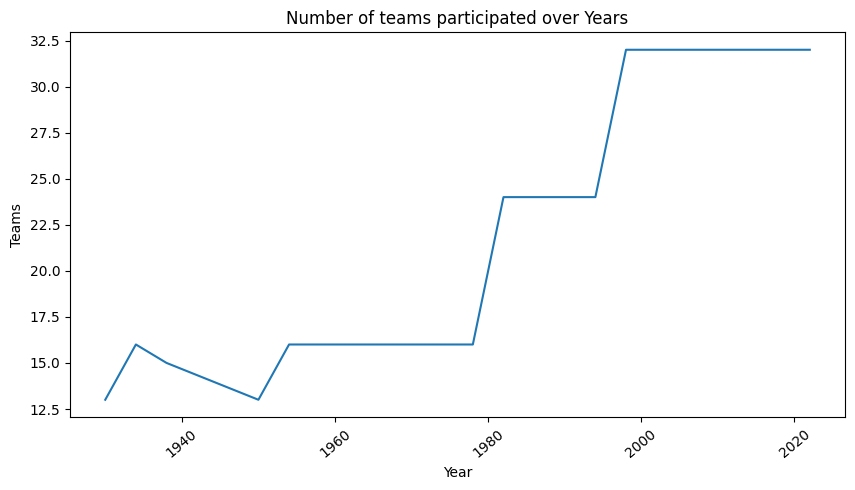

In [5]:
plt.figure(figsize=(10,5))
plt.plot(matches.year, matches.teams)
plt.xlabel('Year')
plt.ylabel('Teams')
plt.xticks(rotation = 40)
plt.title('Number of teams participated over Years')

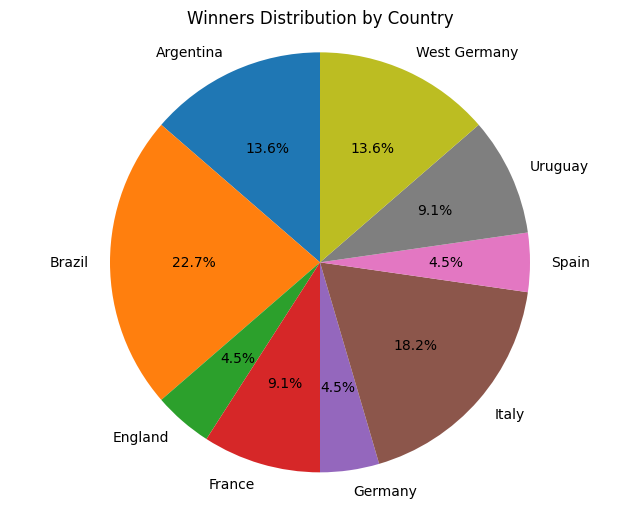

In [6]:
winners_count = matches.groupby(['year', 'winner']).size().unstack(fill_value=0)

plt.figure(figsize=(8, 6))
plt.pie(winners_count.sum(), labels=winners_count.columns, autopct='%1.1f%%', startangle=90)
plt.title('Winners Distribution by Country')
plt.axis('equal')  
plt.show()

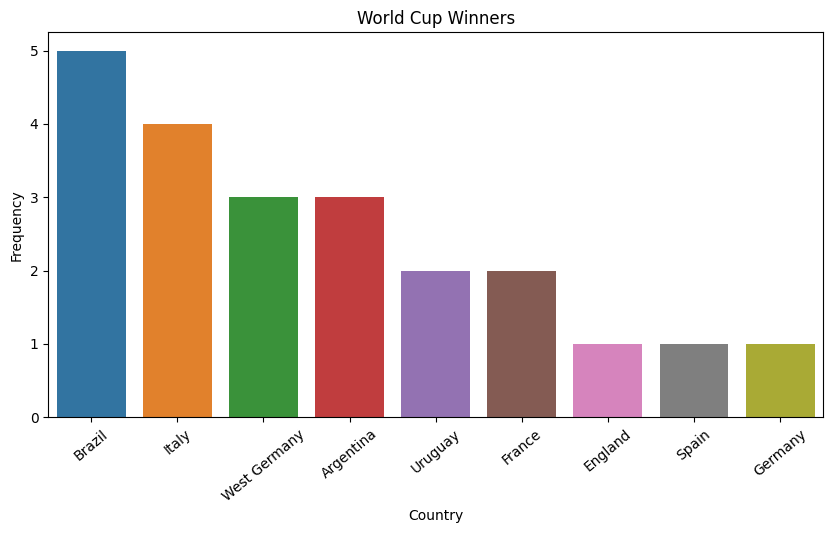

In [7]:
winners_count = matches['winner'].value_counts()
plt.figure(figsize = (10,5))
sns.barplot(x = winners_count.index, y = winners_count.values)
plt.title('World Cup Winners')
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.xticks(rotation=40)
plt.show()

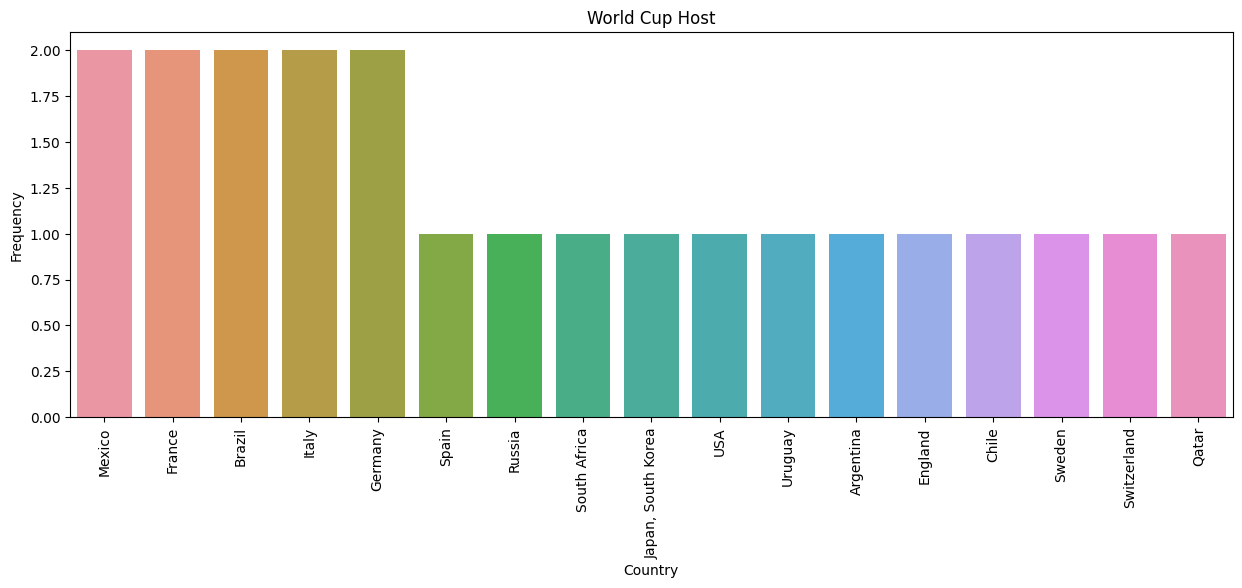

In [8]:
host_count = matches['host'].value_counts()
plt.figure(figsize = (15,5))
sns.barplot(x = host_count.index, y = host_count.values)
plt.title('World Cup Host')
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

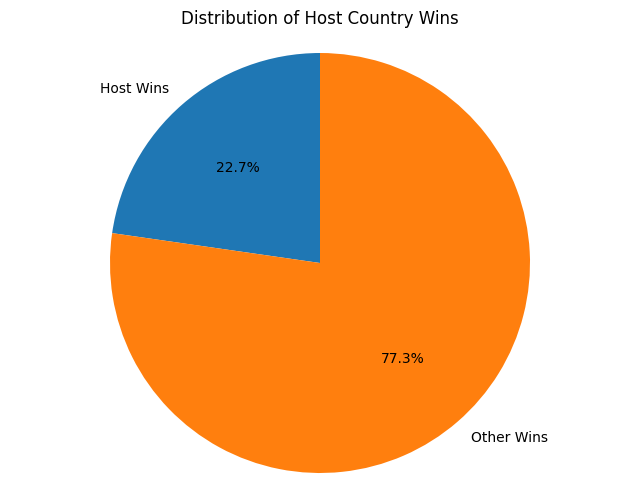

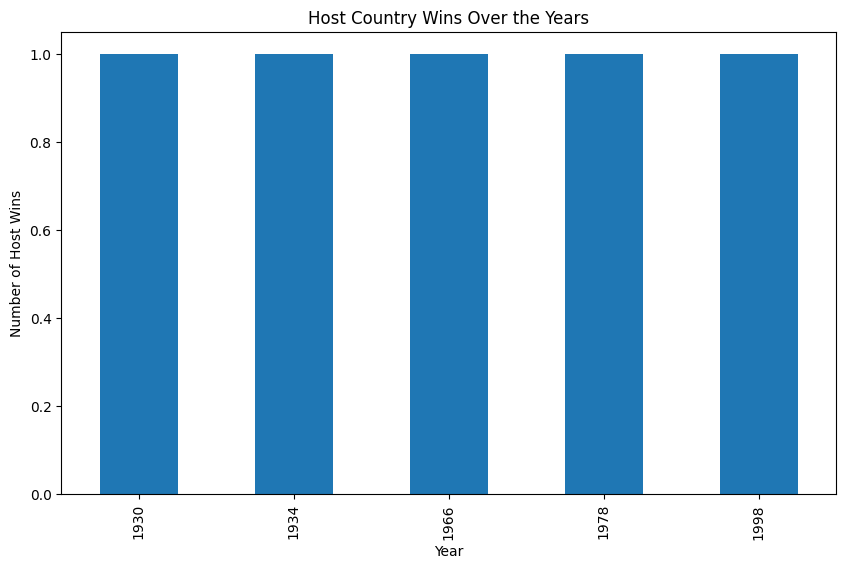

In [9]:
host_wins = matches[matches['winner'] == matches['host']]

num_host_wins = len(host_wins)

plt.figure(figsize=(8, 6))
plt.pie([num_host_wins, len(matches) - num_host_wins], labels=['Host Wins', 'Other Wins'], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Host Country Wins')
plt.axis('equal')
plt.show()

host_wins_by_year = host_wins.groupby('year').size()
host_wins_by_year.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Year')
plt.ylabel('Number of Host Wins')
plt.title('Host Country Wins Over the Years')
plt.show()

In [10]:
matches = pd.read_csv('C:\\KIIT\\5th Semester\\Internship\\Data Scientist\\Week-3\\wcmatches.csv')
matches.head()

,year,country,city,stage,home_team,away_team,home_score,away_score,outcome,win_conditions,winning_team,losing_team,date,month,dayofweek
0,1930,Uruguay,Montevideo,Group 1,France,Mexico,4,1,H,NaN,France,Mexico,13-07-1930,Jul,Sunday
1,1930,Uruguay,Montevideo,Group 4,Belgium,United States,0,3,A,NaN,United States,Belgium,13-07-1930,Jul,Sunday
2,1930,Uruguay,Montevideo,Group 2,Brazil,Yugoslavia,1,2,A,NaN,Yugoslavia,Brazil,14-07-1930,Jul,Monday
3,1930,Uruguay,Montevideo,Group 3,Peru,Romania,1,3,A,NaN,Romania,Peru,14-07-1930,Jul,Monday
4,1930,Uruguay,Montevideo,Group 1,Argentina,France,1,0,H,NaN,Argentina,France,15-07-1930,Jul,Tuesday


In [11]:
cities = matches.groupby(['country','city'])

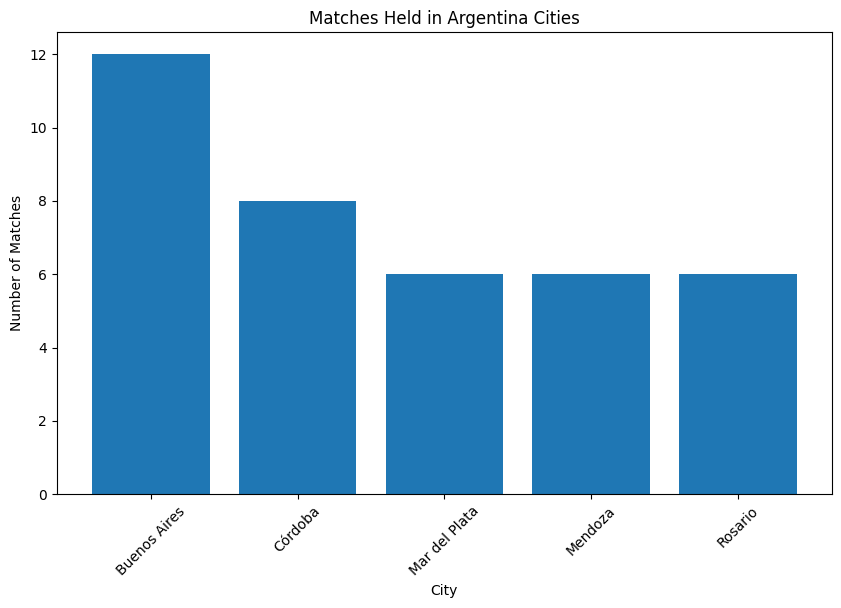

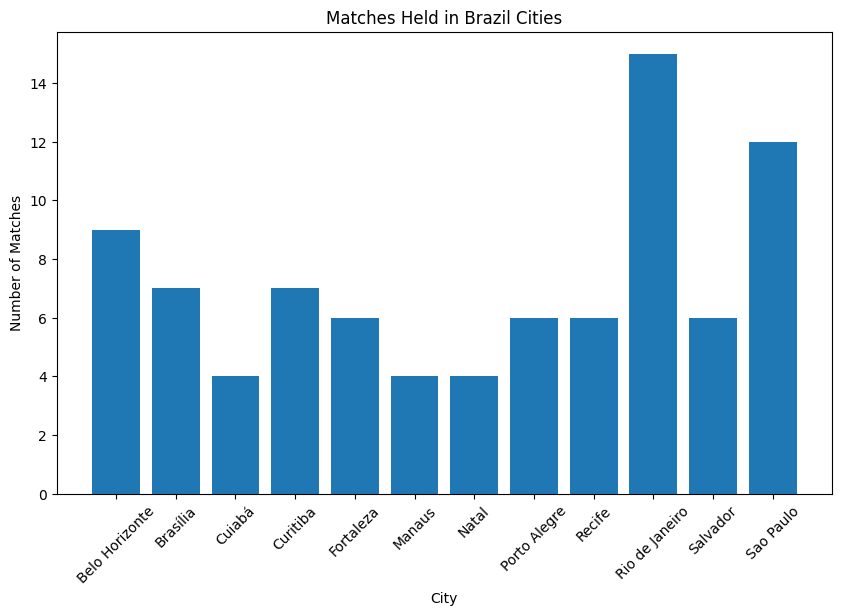

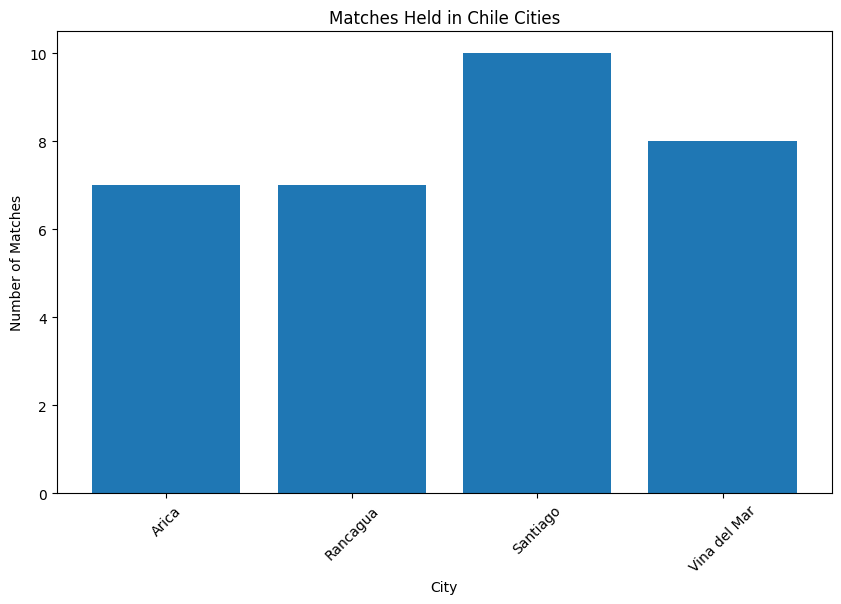

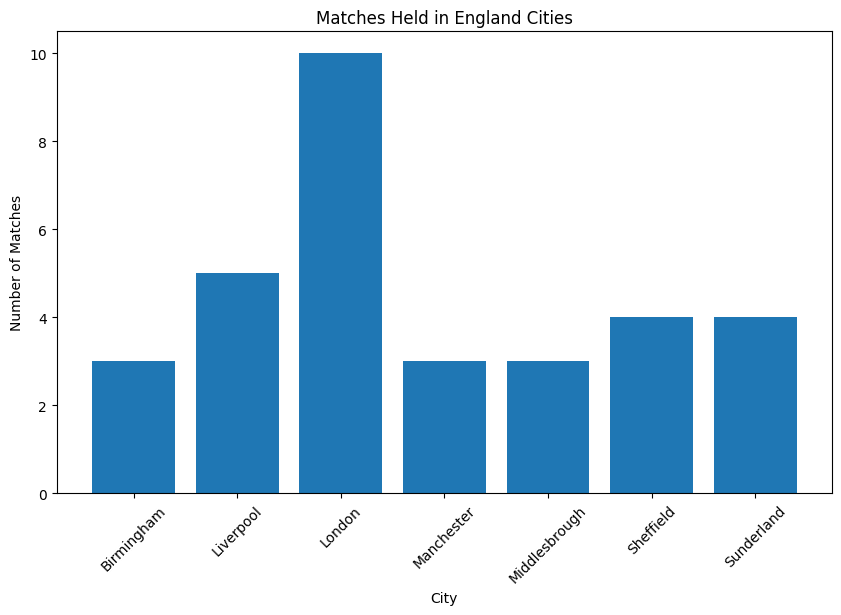

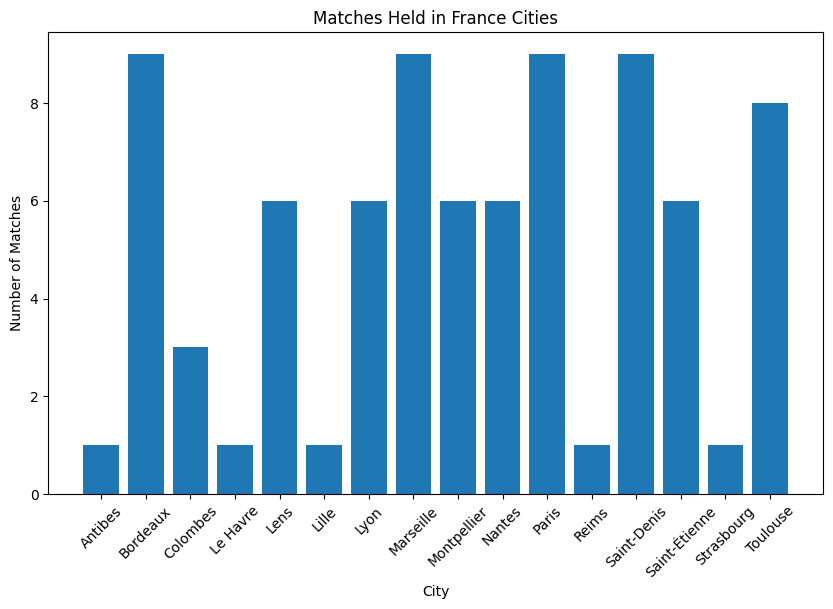

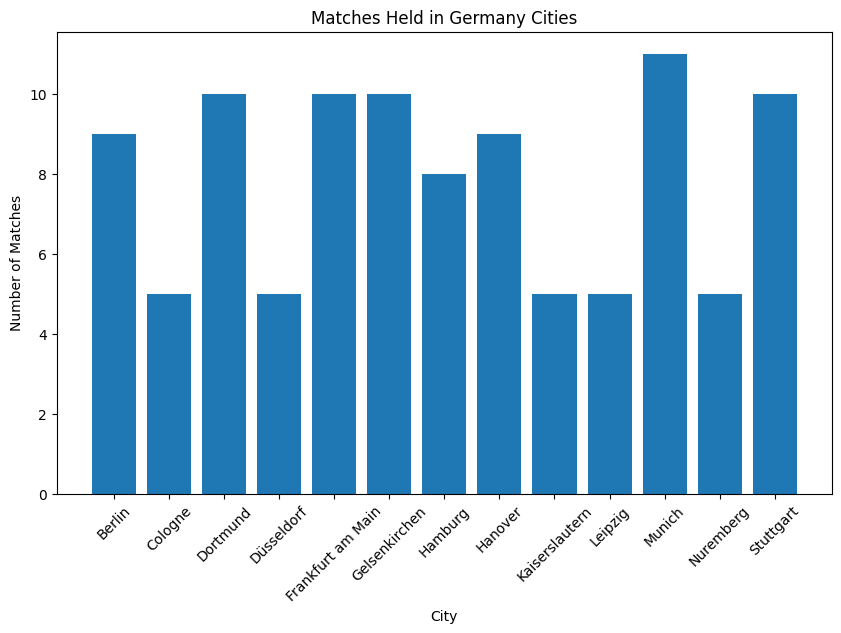

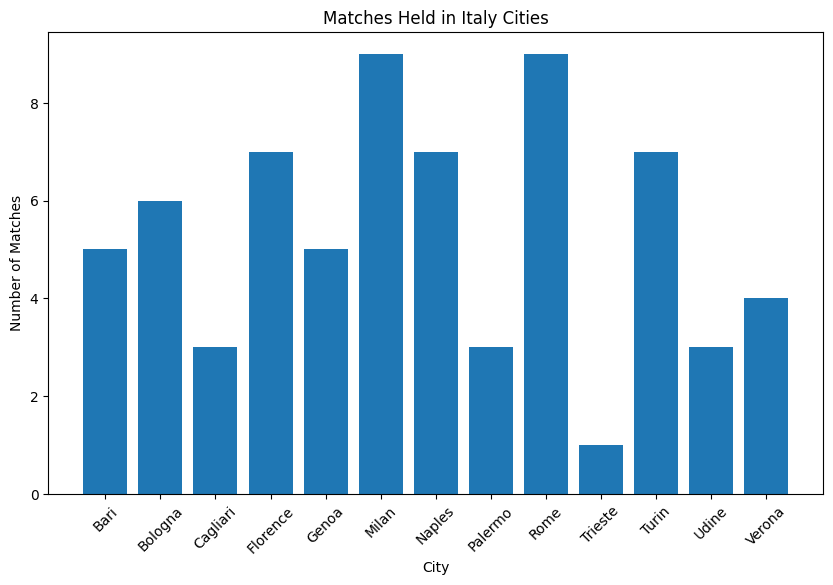

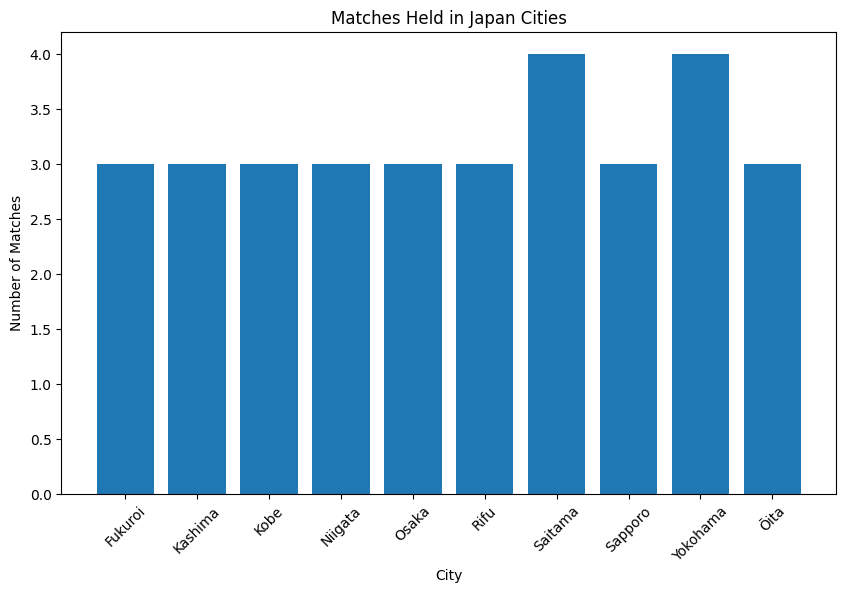

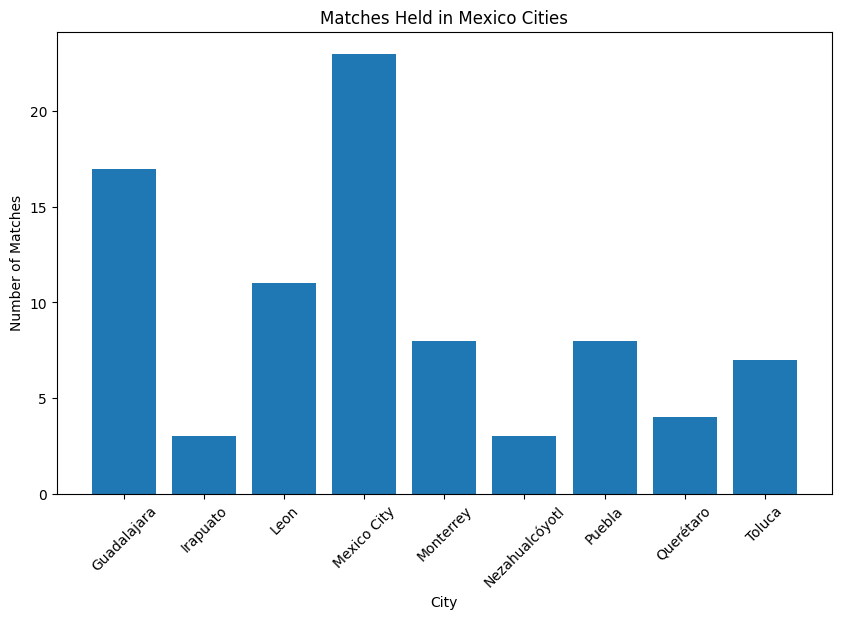

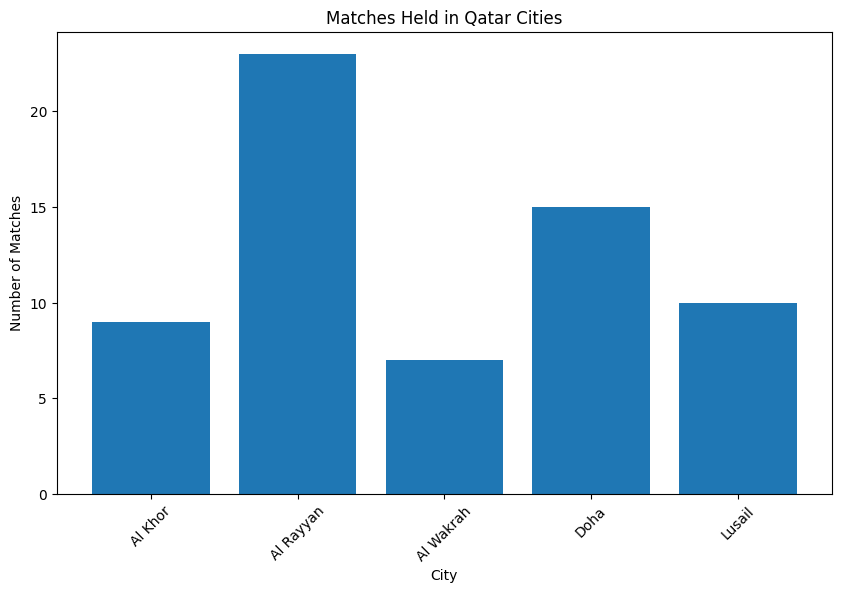

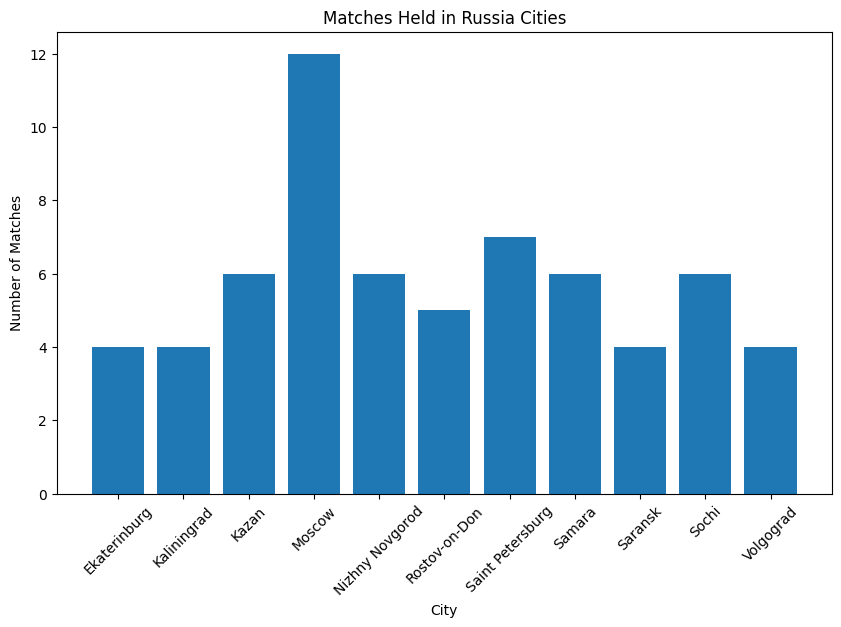

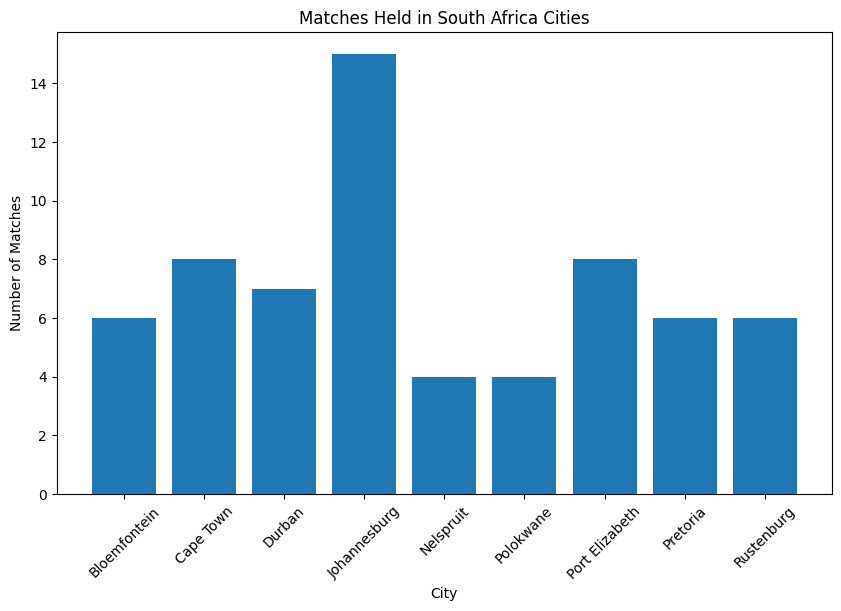

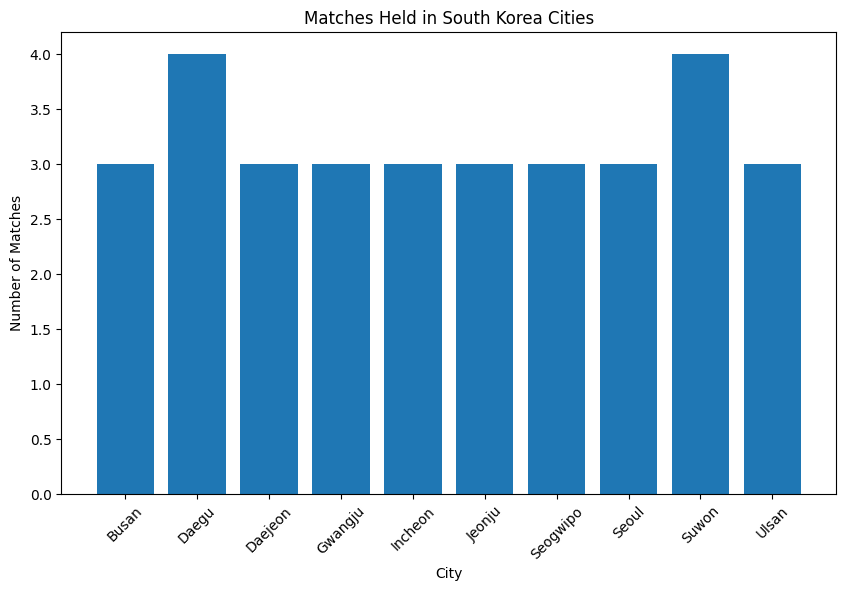

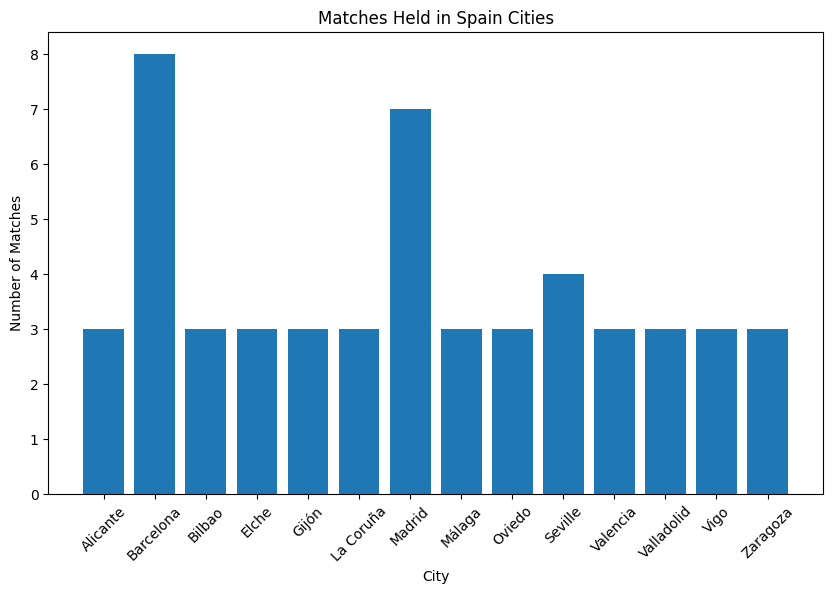

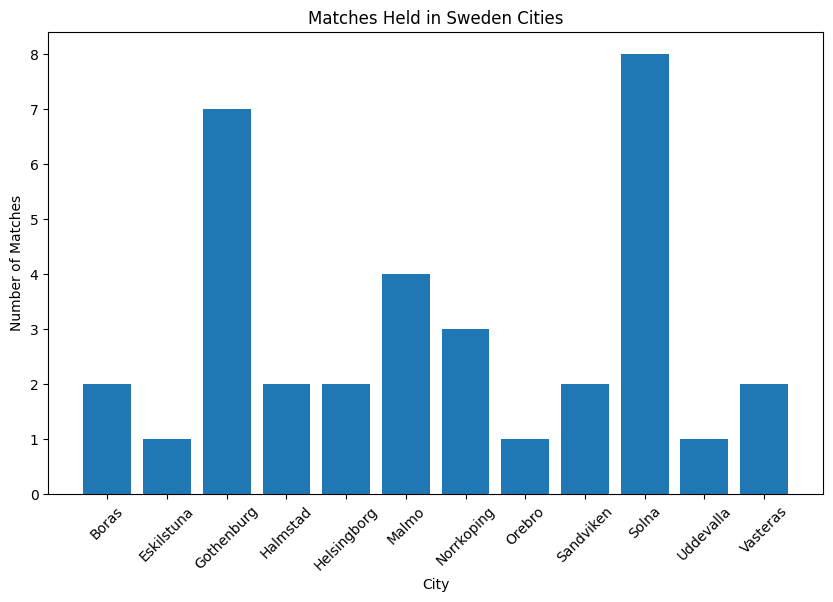

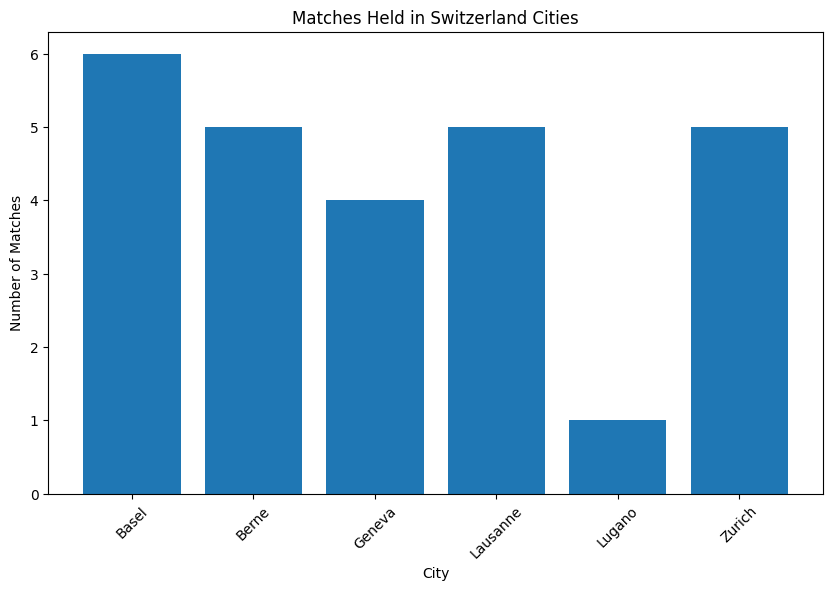

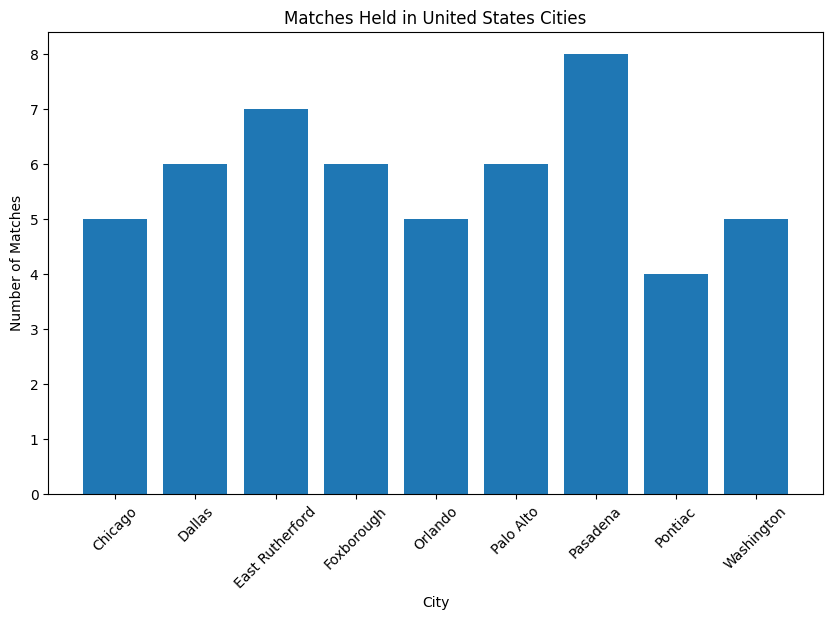

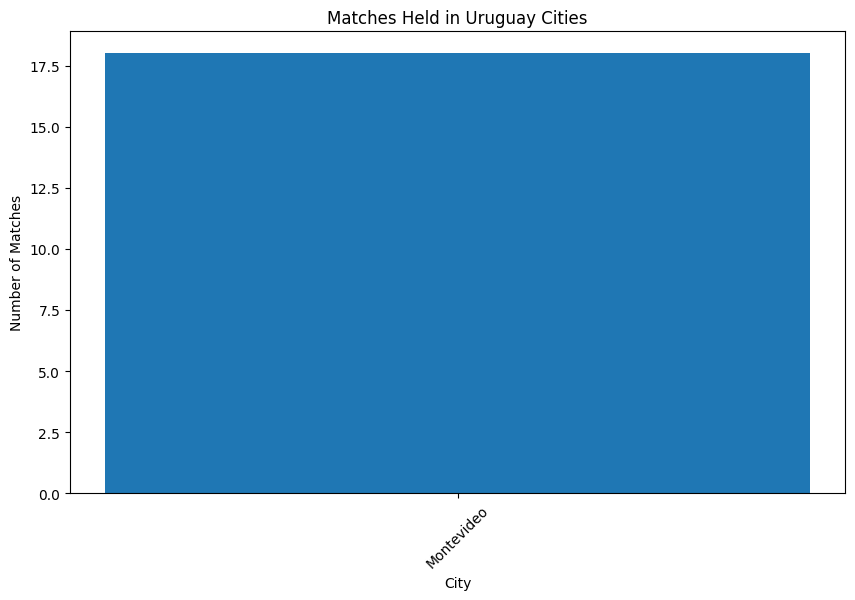

In [15]:
grouped_cities = matches.groupby(['country', 'city']).size().reset_index(name='match_count')
countries = grouped_cities['country'].unique()

for country in countries:
    country_cities = grouped_cities[grouped_cities['country'] == country]
    plt.figure(figsize=(10, 6))
    plt.bar(country_cities['city'], country_cities['match_count'])
    plt.xlabel('City')
    plt.ylabel('Number of Matches')
    plt.title(f'Matches Held in {country} Cities')
    plt.xticks(rotation=45)
    plt.show()

In [26]:
finals_df = matches[matches['stage'] == "Final"]

fig = px.bar(finals_df, x='year', y='home_score',
             hover_data=['home_team', 'away_team'],
             color='home_team',
             labels={'Home Team Goals': 'Number of Goals'},
             title="Teams Who Won Finals Over Years")
fig.show()